In [119]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from tqdm import tqdm, tqdm_notebook
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import functools
import matplotlib.pyplot as plt

pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from string import punctuation

from collections import Counter
import re
import numpy as np

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

def getCategorys():
    return  ['business', 'health', 'technology', 'entertainment', 'science', 'sports']

def setApiKey():
    return '498d86e3c11b4142ad84982f58dba794'

def nameMedia(source, m):
    try: 
        return m[source]
    except:
        return 'Kompas.com'

def url(category):
    apiKey = setApiKey()
    source_url = 'https://newsapi.org/v2/top-headlines?country=id&category='+str(category)+'&apiKey='+str(apiKey)
    data = requests.get(source_url).json()
    return data

def getDailyNews():
    categorys = getCategorys()
    key = setApiKey()
    url = 'https://newsapi.org/v2/top-headlines?country=id&category={0}&apiKey={1}'
    responses = []
    for i, category in tqdm_notebook(enumerate(categorys), total=len(categorys)):
        try:
            u = url.format(category, key)
        except:
            u = url.format('business', key)
        
        response = requests.get(u)
        r = response.json()   
        try:
            for article in r['articles']:
                article['category'] = category
                article['source'] = article['source']['name']
            responses.append(r)
        except:
            print('Rate limit exceeded ... please wait and retry in 6 hours')
            return None
        
    articles = list(map(lambda r: r['articles'], responses))
    articles = list(functools.reduce(lambda x,y: x+y, articles))
    
    news = pd.DataFrame(articles)
    news = news.drop_duplicates()
    news.reset_index(inplace=True, drop=True)
    news['scraping_date'] = datetime.now()
    
    try:
        exportData = pd.read_csv('./news-indo.csv')
        exportData = exportData.append(news)
        #exportData = exportData.drop_duplicates('url')
        exportData.reset_index(inplace=True, drop=True)
        exportData.to_csv('./news-indo.csv', encoding='urf-8', index=False)
    except:
        news.to_csv('./news-indo.csv', index=False, encoding='utf-8')
        
    print('Done')

getDailyNews()
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haidinata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haidinata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Done


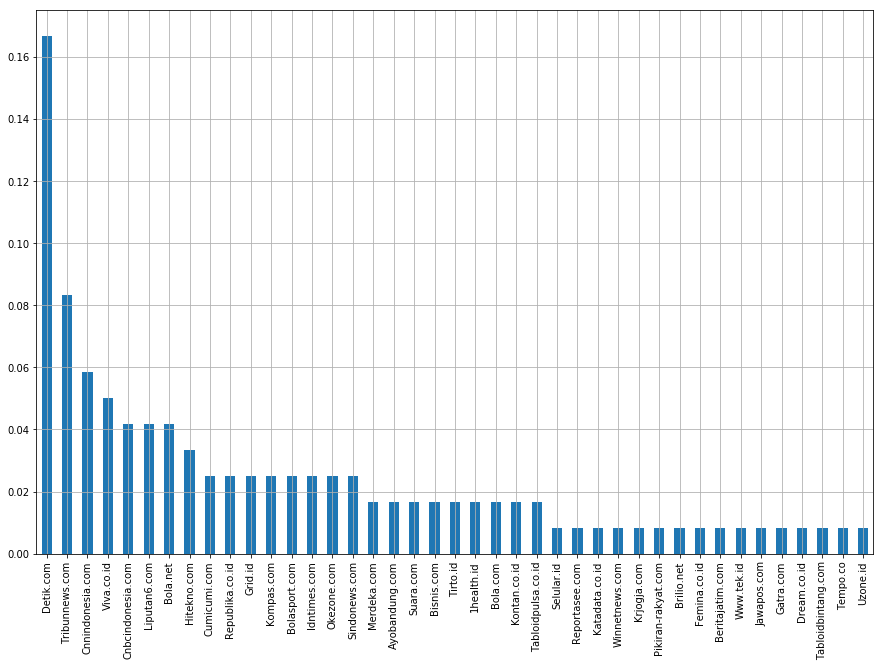

In [120]:
data = pd.read_csv('./news-indo.csv')
data.source.value_counts(normalize=True).plot(kind='bar', grid=True, figsize=(15, 10))

In [9]:
data = data.drop_duplicates('description')

In [10]:
data = data[~data['description'].isnull()]
data.shape

(120, 10)

In [11]:
data.description.map(len)

0       77
1       46
2       82
3      103
4      122
5      115
6      114
7       72
8      204
9      100
10     105
11      86
12      85
13     116
14     156
15     142
16     130
17     121
18      53
19     136
20     142
21     125
22      74
23     155
24     142
25      76
26     260
27     260
28     154
29     130
      ... 
90     118
91     122
92     140
93      77
94      74
95      97
96     146
97      36
98      88
99      94
100    146
101    161
102     89
103    149
104    196
105    159
106    159
107    174
108    144
109    147
110    133
111     92
112    196
113    146
114     83
115    103
116    113
117     75
118    100
119    145
Name: description, Length: 120, dtype: int64

In [12]:
data = data[(data.description.map(len) > 60) & (data.description.map(len) < 200)]
data.reset_index(inplace=True, drop=True)

data.shape

(105, 10)

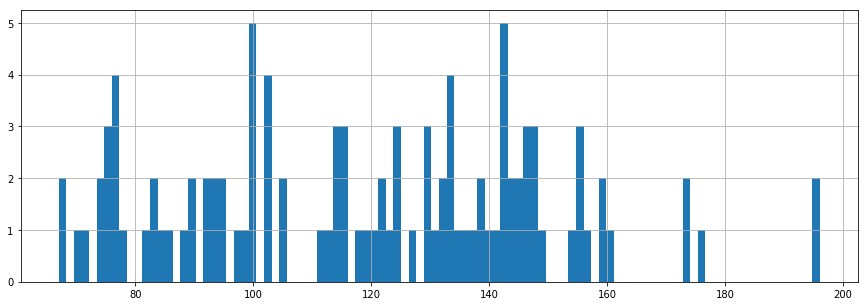

In [13]:
data.description.map(len).hist(figsize=(15, 5), bins=100)

In [15]:
data = data.sample(100, random_state=50)
data.reset_index(inplace=True, drop=True)
data.head(3)

,author,category,content,description,publishedAt,source,title,url,urlToImage,scraping_date
0,Femina Indonesia,health,Foto: Unsplash.com\r\nJakarta tercatat sebagai...,Menjaga tubuh tetap sehat di kota dengan tingk...,2019-08-15T16:03:14Z,Femina.co.id,"Tingkat Polusi Semakin Tinggi, Ini 5 Cara Meny...",https://www.femina.co.id/health-diet/tingkat-p...,https://www.femina.co.id/images/images_article...,2019-08-16 09:46:41.925413
1,Hasiolan Eko P Gultom,sports,"TRIBUNNEWS.COM, BANDUNG - Jendela transfer put...","Persib Bandung, Persebaya Surabaya, Madura Uni...",2019-08-15T13:53:00Z,Tribunnews.com,Rekap Bursa Transfer Klub Liga 1: Persib Cuci ...,https://www.tribunnews.com/superskor/2019/08/1...,https://cdn2.tstatic.net/tribunnews/foto/bank/...,2019-08-16 09:46:41.925413
2,Mohammad Resha Pratama,sports,Istanbul - Sadio Mane memang jadi pahlawan Liv...,Sadio Mane memang jadi pahlawan Liverpool di P...,2019-08-16T00:44:13Z,Detik.com,"Mane: Terima Kasih untuk Dua Assistmu, Bobby -...",https://sport.detik.com/sepakbola/uefa/d-46677...,https://akcdn.detik.net.id/api/wm/2019/08/16/d...,2019-08-16 09:46:41.925413


In [16]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stop_words = factory.get_stop_words()
len(stop_words)

809

In [139]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub("com", "", text)
    text = re.sub('[^a-zA-Z ?*$!]+', '', text)
    text = re.sub(" \d+", " ", text)
    text = re.sub(r'[0-9]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    
    return text

def tokenizer(text):
    text = clean_text(text)
    tokens =  [word_tokenize(sent) for sent in sent_tokenize(text)]
    #memberikan koma di setiap kata
    tokens = list(functools.reduce(lambda x,y: x+y, tokens))
    #filter kata penghubung
    tokens = list(filter(lambda token: token not in (stop_words + list(punctuation)) , tokens))
    
    return tokens

In [149]:
data['description'] = data['description'].map(lambda d: str(d))
data['tokens'] = data['description'].progress_map(lambda d: tokenizer(d))

In [150]:
for description, tokens in zip(data['description'].head(5), data['tokens'].head(5)):
    print('description:', description)
    print('tokens:', tokens)
    print()

description: Perubahan warna Yamaha Vixion itu dilakukan Yamaha untuk menyesuaikan diri dengan tren gaya hidup dan mampu merefleksikan karakter dari sang pengendara.
tokens: ['perubahan', 'warna', 'yamaha', 'vixion', 'yamaha', 'menyesuaikan', 'tren', 'gaya', 'hidup', 'merefleksikan', 'karakter', 'sang', 'pengendara']

description: Berita Lihat Angka Penjualan Honda Brio Satya, Siap-siap Kaget terbaru hari ini 2019-08-16 08:24:02 dari sumber yang terpercaya
tokens: ['berita', 'angka', 'penjualan', 'honda', 'brio', 'satya', 'kaget', 'terbaru', 'sumber', 'terpercaya']

description: Sampai saat ini kampanye sudah berjalan 42 persen dari total target recall Toyota Rush.
tokens: ['kampanye', 'berjalan', 'persen', 'total', 'target', 'recall', 'toyota', 'rush']

description: Mantan Gubernur Federal Reserve Janet Yellen menegaskan Amerika Serikat (AS) tidak sedang menuju resesi
tokens: ['mantan', 'gubernur', 'federal', 'reserve', 'janet', 'yellen', 'amerika', 'serikat', 'as', 'resesi']

descrip

In [142]:
def keywords(category):
    tokens = data[data['source'] == category]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    
    return counter.most_common(5)

for source in set(data['source']):
    print('source:', source)
    print('top 10 keywords:', keywords(source))
    print('---')
    


source: Cumicumi.com
top 10 keywords: [('dede', 3), ('anak', 2), ('sunandar', 2), ('penyakit', 2), ('fairuz', 2)]
---
source: Cnbcindonesia.com
top 10 keywords: [('resesi', 2), ('mantan', 1), ('gubernur', 1), ('federal', 1), ('reserve', 1)]
---
source: Suara.com
top 10 keywords: [('pretomanid', 1), ('menyembuhkan', 1), ('persen', 1), ('penderita', 1), ('tbc', 1)]
---
source: Winnetnews.com
top 10 keywords: [('kepala', 3), ('sakit', 2), ('tidur', 1), ('hipertensi', 1), ('alias', 1)]
---
source: Tirto.id
top 10 keywords: [('gb', 3), ('meter', 2), ('beli', 1), ('paket', 1), ('data', 1)]
---
source: Ayobandung.com
top 10 keywords: [('indonesia', 2), ('kereta', 2), ('api', 2), ('band', 2), ('konser', 2)]
---
source: Idntimes.com
top 10 keywords: [('duel', 1), ('sengit', 1), ('saudara', 1), ('segmen', 1), ('menengah', 1)]
---
source: Republika.co.id
top 10 keywords: [('peningkatan', 1), ('kemakmuran', 1), ('kurangnya', 1), ('aktivitas', 1), ('fisik', 1)]
---
source: Tabloidbintang.com
top 10

In [143]:
vectorizer = TfidfVectorizer(min_df=4, analyzer='word', ngram_range=(1, 50))
vz = vectorizer.fit_transform(list(data['tokens'].map(lambda tokens: ' '.join(tokens))))

vz.shape


(120, 24)

In [144]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [145]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(30)

,tfidf
tahun,3.493205
berita,3.598566
bumi,3.598566
indonesia,3.598566
terbaru,3.716349
terbaru sumber terpercaya,3.849880
terbaru sumber,3.849880
hasil,3.849880
sumber terpercaya,3.849880
penyakit,3.849880


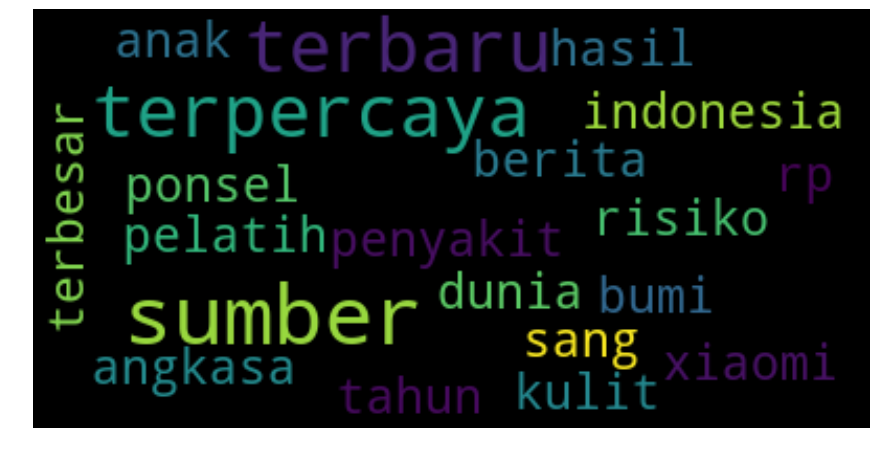

In [146]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(30))

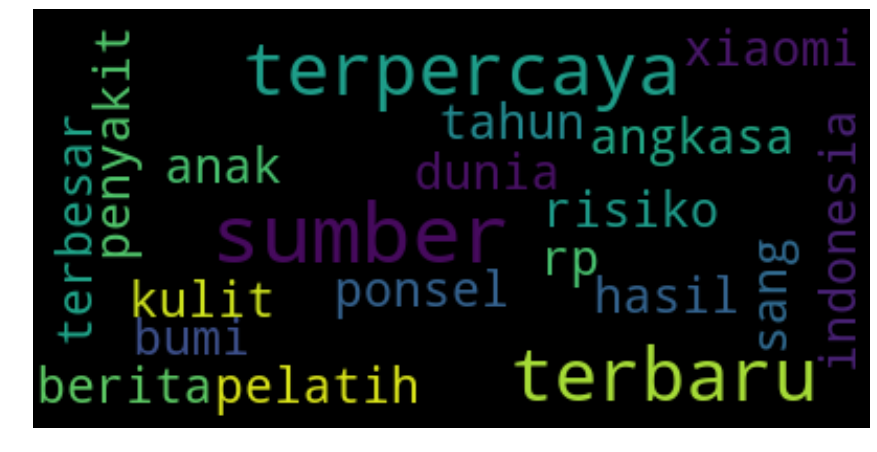

In [147]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(30))